<a href="https://colab.research.google.com/github/devvashisth07/early-event-detection/blob/main/EED_for_slops_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

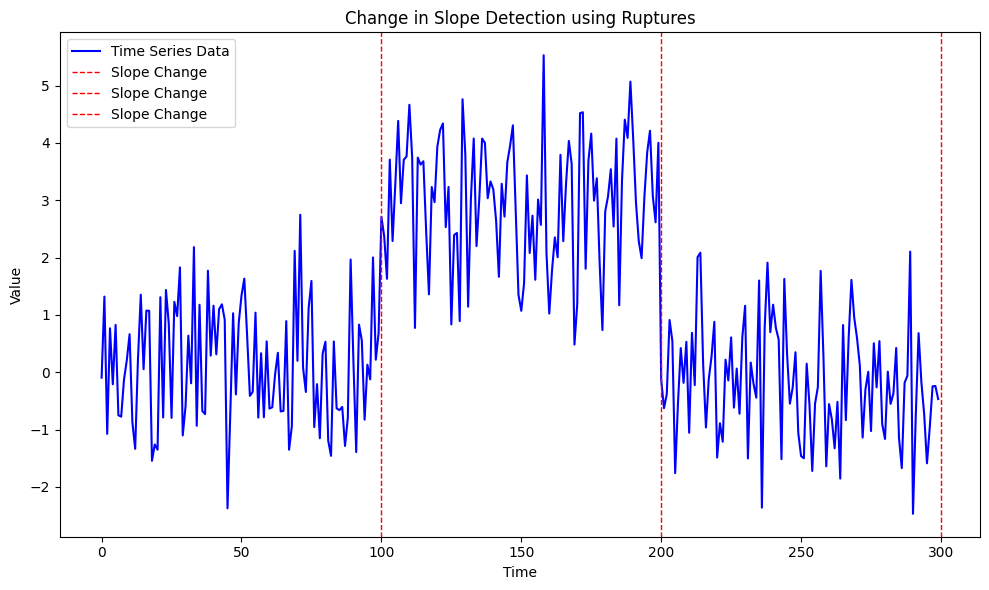

Number of detected slope changes: 3


In [4]:
!pip install ruptures
import numpy as np
import matplotlib.pyplot as plt
from ruptures.detection import Pelt

# Define a custom cost function for detecting changes in slope
def custom_slope_cost(cpt, data):
    x = np.arange(cpt)
    y = data[:cpt]
    slope, _ = np.polyfit(x, y, 1)
    return np.abs(slope)

# Generate synthetic time series data with changes in slope
n_samples = 300
data = np.concatenate([np.random.normal(loc=0, scale=1, size=100),
                       np.random.normal(loc=3, scale=1, size=100),
                       np.random.normal(loc=0, scale=1, size=100)])

# Apply change point detection for slope changes
model = Pelt(model="l2").fit(data)  # Using the "l2" cost model
result = model.predict(pen=10)     # Use a specific penalty value here

# Count the number of detected slope changes
num_slope_changes = len(result)

# Visualize the results
plt.figure(figsize=(10, 6))
plt.plot(data, color='blue', label='Time Series Data')

for bkpt in result:
    plt.axvline(x=bkpt, color='red', linestyle='--', linewidth=1, label='Slope Change')

plt.title("Change in Slope Detection using Ruptures")
plt.xlabel("Time")
plt.ylabel("Value")
plt.legend()
plt.tight_layout()
plt.show()

print("Number of detected slope changes:", num_slope_changes)


